In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# load the dataset
df = pd.read_csv("/content/drive/MyDrive/datasets/datastes/assignment2/weather_forecast_data.csv")

In [8]:
# Task 1: Preprocessing
# 1. Check for missing values
def checkMissing(df):
    print("Missing values per column:")
    print(df.isnull().sum())

In [9]:
# 2. Handle missing values by two techniques
def handle_missing(df, strategy):
    if strategy == "drop":
        return df.dropna()
    elif strategy == "replace":
        df_copy = df.copy()
        # Fill numeric columns with mean
        for col in df_copy.select_dtypes(include="number").columns:
            df_copy[col] = df_copy[col].fillna(df_copy[col].mean())
        # Fill categorical columns with mode
        for col in df_copy.select_dtypes(include="object").columns:
            df_copy[col] = df_copy[col].fillna(df_copy[col].mode()[0])
        return df_copy
    else:
        raise ValueError("Invalid missing value strategy")

In [10]:
# 3. Preprocessing
def preprocess(df, scaling):
    X = df.drop(columns=["Rain"])
    y = df["Rain"]

    # Encode target
    y = LabelEncoder().fit_transform(y)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale numeric features
    scaler = MinMaxScaler() if scaling == "min-max" else StandardScaler()
    toscale = X_train.select_dtypes(include="number").columns
    X_train[toscale] = scaler.fit_transform(X_train[toscale])
    X_test[toscale] = scaler.transform(X_test[toscale])

    return X_train, X_test, y_train, y_test

In [11]:
# 4. Evaluate model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    return accuracy, precision, recall

In [25]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
def plot_dt(dt,X_train):
  plt.figure(figsize=(10, 6))
  plot_tree(dt, filled=True, feature_names=X_train.columns, class_names=['No Rain', 'Rain'])
  plt.title("Decision Tree Visualization")
  plt.show()

# humidty was taken as the root of the decision tree because it has the least gini impurity


Missing Value Technique: drop
Comparison of KNN using sklearn:
 Accuracy | Precision | Recall
------------------------------


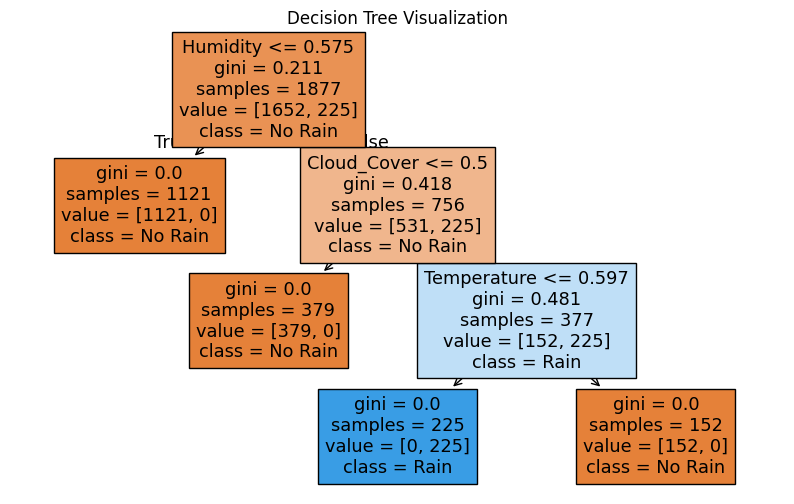

1.00     | 1.00      | 0.99

Missing Value Technique: replace
Comparison of KNN using sklearn:
 Accuracy | Precision | Recall
------------------------------


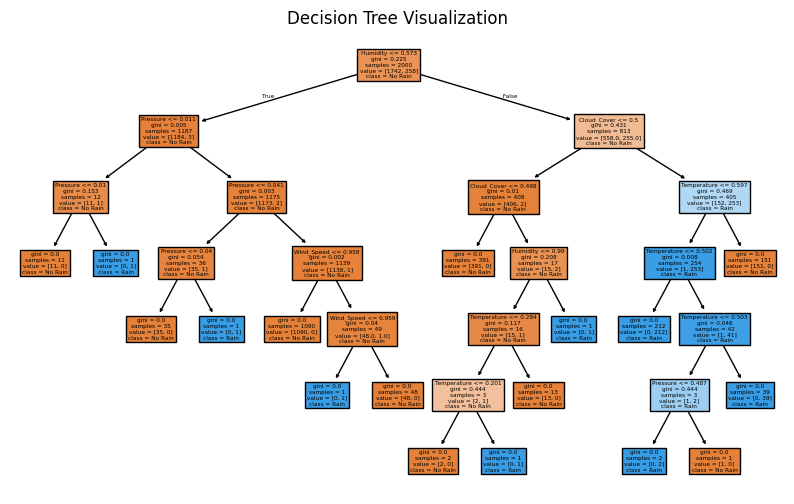

1.00     | 0.98      | 0.98


In [26]:
from sklearn.tree import DecisionTreeClassifier
def DecisionTree(X_train, y_train, X_test, y_test):
    dt = DecisionTreeClassifier()
    dt.fit(X_train, y_train)
    metrics = evaluate_model(dt, X_test, y_test)
    plot_dt(dt,X_train)
    return metrics

def compare_strategies_dt(df):
    techniques = ["drop", "replace"]

    for technique in techniques:
        print(f"\nMissing Value Technique: {technique}")
        df_cleaned = handle_missing(df, technique)

        X_train, X_test, y_train, y_test = preprocess(df_cleaned, "min-max")

        print("Comparison of KNN using sklearn:")
        print(" Accuracy | Precision | Recall")
        print("------------------------------")

        results = DecisionTree(X_train, y_train, X_test, y_test)
        print(f"{results[0]:.2f}     | {results[1]:.2f}      | {results[2]:.2f}")




compare_strategies_dt(df)

